In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/forestfires.csv')

In [ ]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.tail(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


Cek Informasi Dataset

* X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* month - month of the year: 'jan' to 'dec'
* day - day of the week: 'mon' to 'sun'
* FFMC - FFMC index from the FWI system: 18.7 to 96.20
* DMC - DMC index from the FWI system: 1.1 to 291.3
* DC - DC index from the FWI system: 7.9 to 860.6
* ISI - ISI index from the FWI system: 0.0 to 56.10
* temp - temperature in Celsius degrees: 2.2 to 33.30
* RH - relative humidity in %: 15.0 to 100
* wind - wind speed in km/h: 0.40 to 9.40
* rain - outside rain in mm/m2 : 0.0 to 6.4
* area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Data di atas tidak ada memuat missing data

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

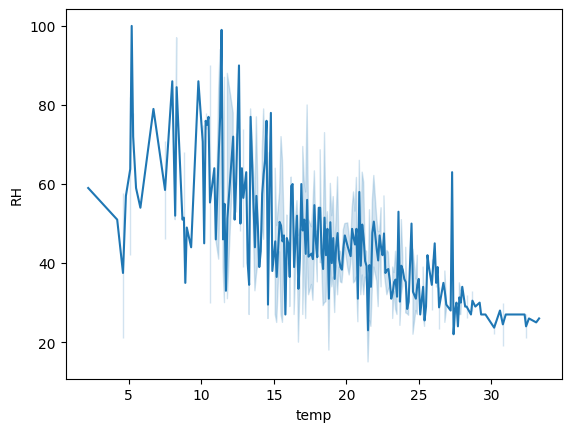

In [ ]:
sb.lineplot(x='temp', y='RH', data=df)
plt.show()

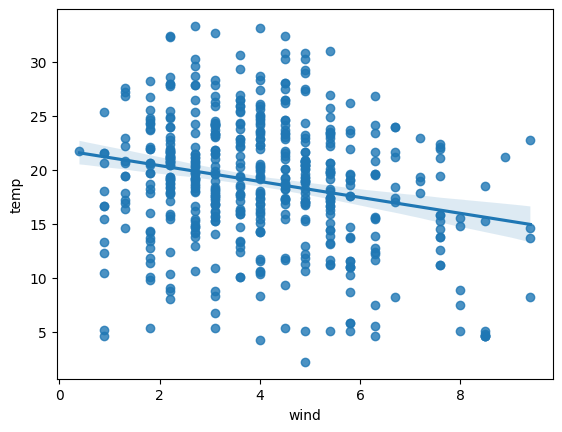

In [ ]:
sb.regplot(x='wind', y='temp', data=df)
plt.show()

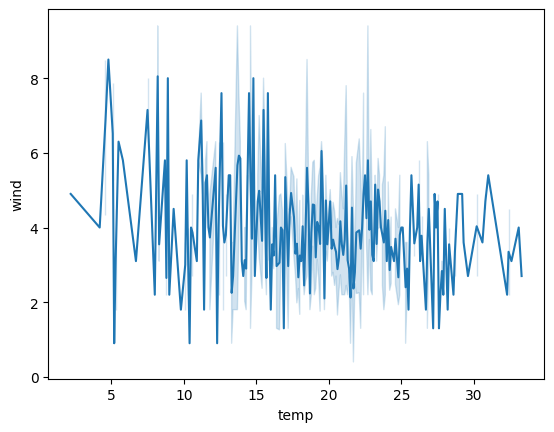

In [ ]:
sb.lineplot(x='temp', y='wind', data=df)
plt.show()

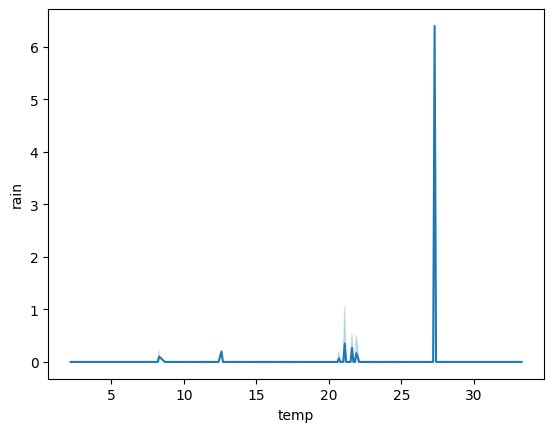

In [ ]:
sb.lineplot(x='temp', y='rain', data=df)
plt.show()

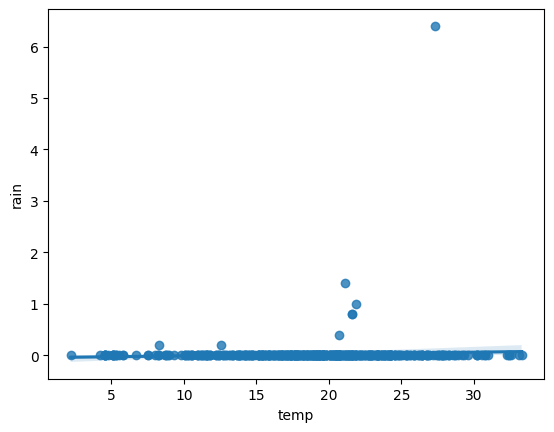

In [ ]:
sb.regplot(x='temp', y='rain', data=df)
plt.show()

# Data Preprocessing

Hapus data yang berjenis kategorial atau bukan data numerik yaitu bulan dan hari

In [ ]:
df.drop(columns=['month','day'], inplace=True)

In [ ]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


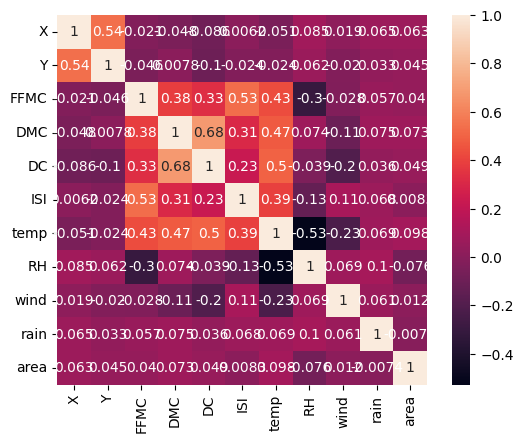

In [ ]:
corr = df.corr()
sb.heatmap(corr, square=True, annot=True)
plt.show()

# Modeling

In [ ]:
X = df.loc[:, df.columns !='area'].values
y = df['area'].values

In [ ]:
X

array([[ 7. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. , 94.4, ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 79.5, ..., 31. ,  4.5,  0. ]])

In [ ]:
X.shape

(517, 10)

In [ ]:
y = y.reshape(-1,1)
y.shape

(517, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('X_test', y_test.shape)

X_train (413, 10)
X_test (104, 10)
y_train (413, 1)
X_test (104, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
y_train[:, :] = sc.fit_transform(y_train[:, :])
y_test[:, :] = sc.transform(y_test[:, :])

In [ ]:
X_train

array([[-0.69046229, -0.23274839, -0.02655293, ...,  0.66067453,
         0.77617805, -0.07126589],
       [-0.25905393, -1.0543303 , -0.06158922, ...,  1.14554095,
         0.49997477, -0.07126589],
       [-1.55327901, -0.23274839,  0.18366482, ...,  0.35763301,
         0.00280885, -0.07126589],
       ...,
       [ 1.03517115,  0.58883352,  0.32380998, ..., -0.24845002,
         0.00280885, -0.07126589],
       [-1.55327901, -0.23274839,  0.32380998, ..., -0.30905832,
        -0.99152299, -0.07126589],
       [-1.12187065, -1.87591221,  0.72672733, ..., -1.33939947,
         0.27901213, -0.07126589]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train,np.ravel(y_train))
dtr_pred = dtr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(dtr_pred, y_test))
print('MAE =', mae(dtr_pred, y_test))
print('R2 Score =', r2_score(dtr_pred, y_test))

MSE = 11.5764400757226
MAE = 0.8913239738740381
R2 Score = -1.134357315988173


Coba reverse matriks

In [ ]:
dtr_pred = dtr_pred.reshape(-1,1)

In [ ]:
dtr_pred = sc.inverse_transform(dtr_pred)

In [ ]:
print('MSE =', mse(dtr_pred, y_test))
print('MAE =', mae(dtr_pred, y_test))
print('R2 Score =', r2_score(dtr_pred, y_test))

MSE = 11334.027364367977
MAE = 23.69511546682109
R2 Score = -0.051288308030172036


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
regresi = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=1000)
regresi.fit(X_train, np.ravel(y_train))
y_pred = regresi.predict(X_test)

In [ ]:
print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))

MSE = 6.858638371539887
MAE = 0.6995922579917188
R2 Score = -8.171521323870907


Sepertinya kita akan mengambil fitur yang dianggap penting untuk mendapatkan skor tidak minus

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inisialisasi model Gradient Boosting Regressor
regressor = GradientBoostingRegressor(random_state=42)

# Tentukan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Inisialisasi Grid Search dengan Cross Validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Lakukan fitting model dengan data
grid_search.fit(X_train, np.ravel(y_train))

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Lakukan prediksi pada data pengujian
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print('MSE =', mse)
print('MAE =', mae)
print('R2 Score =', r2)


MSE = 11820.63598010068
MAE = 25.659624439292607
R2 Score = -0.0027888125883426262
